In [2]:
# Configure matplotlib.
%matplotlib inline

# Unclutter the display.
import pandas as pd
import geopandas as gpd
import geoplot as gplt

import geoplot.crs as gcrs

pd.set_option('max_columns', 6)

eqs_data = gpd.read_file('../data/raw_geojson.json')
map_data = gpd.read_file('../data/nepal_local.geojson')

country = []
for idx, row in eqs_data.iterrows():
    country.append(row['place'].split(',')[-1].strip())

eqs_data['place'] = country

nepal_data = eqs_data.query(f"place == 'Nepal'")

In [52]:
magnitudes = [2**mag for mag in nepal_data['mag']]
magnitudes

[16.0,
 18.37917367995256,
 32.0,
 25.99207668339954,
 18.37917367995256,
 19.698310613518657,
 22.627416997969522,
 21.112126572366314,
 19.698310613518657,
 22.627416997969522,
 29.857055729177844,
 39.396621227037315,
 17.148375400580687,
 34.29675080116137,
 22.627416997969522,
 32.0,
 17.148375400580687,
 21.112126572366314,
 22.627416997969522,
 17.148375400580687,
 18.37917367995256,
 39.396621227037315,
 21.112126572366314,
 19.698310613518657,
 19.698310613518657,
 29.857055729177844,
 16.0,
 51.98415336679908,
 19.698310613518657,
 19.698310613518657,
 21.112126572366314,
 18.37917367995256,
 24.251465064166364,
 32.0,
 21.112126572366314,
 22.627416997969522,
 22.627416997969522,
 22.627416997969522,
 21.112126572366314,
 24.251465064166364,
 16.0,
 22.627416997969522,
 25.99207668339954,
 22.627416997969522,
 25.99207668339954,
 16.0,
 18.37917367995256,
 17.148375400580687,
 19.698310613518657,
 17.148375400580687,
 22.627416997969522,
 19.698310613518657,
 21.112126572366

<GeoAxesSubplot:>

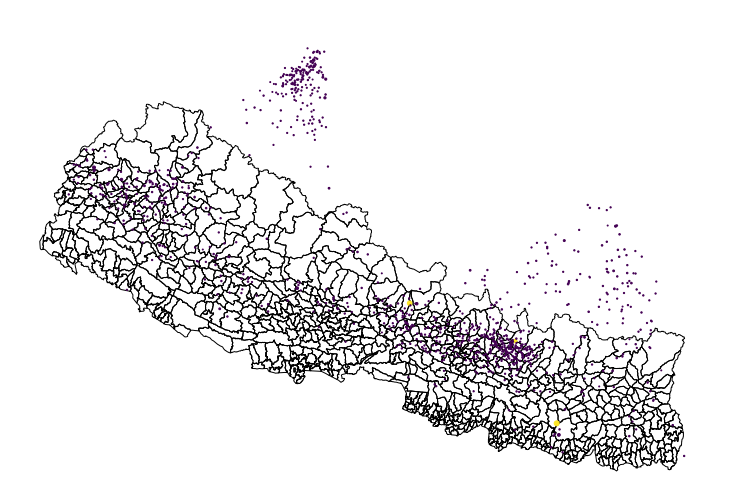

In [56]:
ax = gplt.polyplot(map_data, projection=gcrs.WebMercator(), figsize=(14,9))

colors = ['red' if mag>7 else 'blue' for mag in nepal_data['mag']]

gplt.pointplot(nepal_data['geometry'],hue=colors, ax=ax, scale=magnitudes)

In [46]:
nepal_data['geometry']

11      POINT Z (87.55920 28.56250 10.00000)
15      POINT Z (87.58260 28.80930 41.26000)
31      POINT Z (87.44550 28.82670 10.00000)
37      POINT Z (87.28520 28.70520 10.00000)
38      POINT Z (85.71930 27.85070 10.00000)
                        ...                 
6223    POINT Z (81.38200 29.52900 10.00000)
6246    POINT Z (86.68500 28.92500 15.00000)
6283    POINT Z (83.31100 28.39700 15.00000)
6286    POINT Z (86.58900 26.88500 15.00000)
6291    POINT Z (80.74500 29.73000 20.00000)
Name: geometry, Length: 1107, dtype: geometry